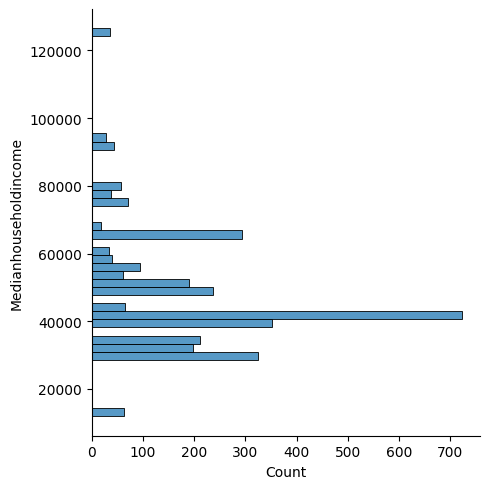

In [214]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("crime-housing-austin-2015.csv")

##Looks at data of income/homevalue of burglarized properties to see which are being targeted

pop = df[['Location','Medianhouseholdincome','Highest_Offense_Desc','Medianhomevalue','Report_Date','Zip_Code_Housing','Unemployment','Populationbelowpovertylevel']]

##only looking at ones we have the proper data for

## One data set to two seperate values
pop = pop[pop.Highest_Offense_Desc == 'BURGLARY OF RESIDENCE']
pop = pop[pop.Medianhouseholdincome.isnull() != True]
pop = pop[pop.Medianhomevalue.isnull() != True]
##changes income to a interger value so that we can calculate things easier
pop['Medianhouseholdincome'] = pop['Medianhouseholdincome'].replace('[\$,]', '', regex=True).astype(int)

sns.displot(data = pop, y='Medianhouseholdincome')


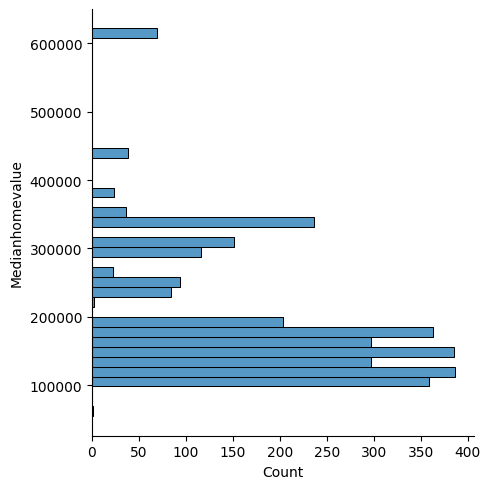

In [215]:
##Compares home values with the amount of crimes that have been committed so we can see that value of those homes that are targeted
pop['Medianhomevalue'] = pop['Medianhomevalue'].replace('[\$,]', '', regex=True).astype(int)
sns.displot(data = pop, y='Medianhomevalue')

## -- These numbers are too spread out and don't tell us a lot --
#mean = pop.Medianhomevalue.mean()
#display(mean) --- 197601.137
#standDiv = pop.Medianhomevalue.std()
#display(standDiv) --- 100850

873

2293

145697.07678883072

27504.606894896955

Text(0.5, 1.0, 'Buglar victims 100k-200k')

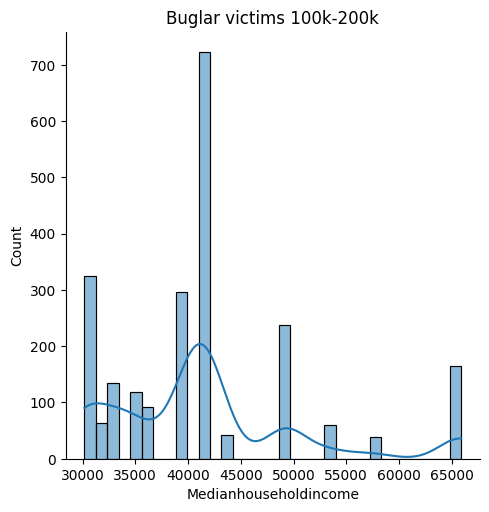

In [216]:
##take a tighter bound standard diviation compared to the last. Most data is between 200000 and 100000
majorityOfVictims = pop.copy()
display(len(pop[pop.Medianhomevalue > 200000]))
display(len(pop[pop.Medianhomevalue < 200000]))
majorityOfVictims = majorityOfVictims[majorityOfVictims.Medianhomevalue <= 200000]
majorityOfVictims = majorityOfVictims[majorityOfVictims.Medianhomevalue >= 100000]
##report found values. much better than previous. 
mean = majorityOfVictims.Medianhomevalue.mean()
display(mean)
standDiv = majorityOfVictims.Medianhomevalue.std()
display(standDiv)

##sns.regplot(y = 'Medianhomevalue',x='Medianhouseholdincome',data = majorityOfVictims)
sns.displot(x='Medianhouseholdincome',data = majorityOfVictims, kde=True)
plt.title("Buglar victims 100k-200k")
##sns.lineplot(y="Medianhomevalue", x="Medianhouseholdincome",
##             data=majorityOfVictims)

array([26, 40, 32, 16, 29,  9, 33, 24,  7, 38, 11, 21, 20, 66,  6,  8, 18,
        3, 19, 10,  5,  1, 37])

PearsonRResult(statistic=0.6871638686965619, pvalue=0.0)

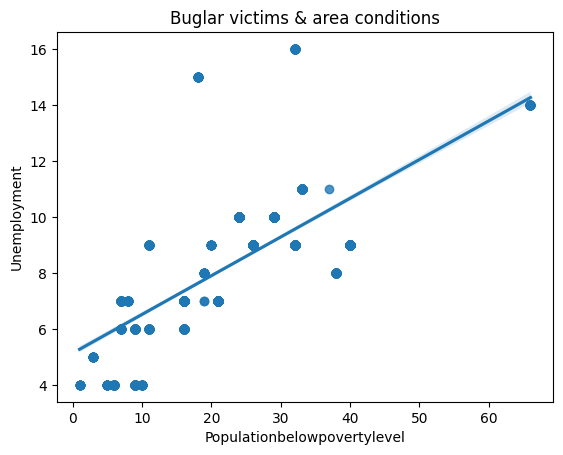

In [217]:
##Show area conditions for victims

pop['Populationbelowpovertylevel'] = pop['Populationbelowpovertylevel'].replace('%', '', regex=True).astype(int)
pop['Medianhouseholdincome'] = pop['Medianhouseholdincome'].replace('$', '', regex=True).astype(int)
pop['Unemployment'] = pop['Unemployment'].replace('%', '', regex=True).astype(int)
std = newdf['Population']


sns.regplot(data=pop, x='Populationbelowpovertylevel', y='Unemployment')
plt.title("Buglar victims & area conditions")

display(pop.Populationbelowpovertylevel.unique())

display(stats.pearsonr(pop['Populationbelowpovertylevel'], pop['Unemployment']))

149153.69790808763

26878.799036437253

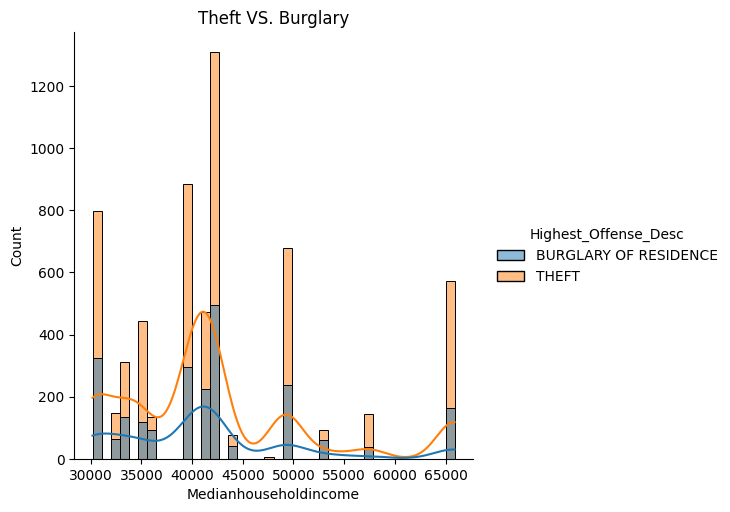

TtestResult(statistic=3.083979525889221, pvalue=0.0020491767987979095, df=8361.0)


In [218]:
theftAndBurg = df.copy()
theftAndBurg = theftAndBurg[theftAndBurg["Highest_Offense_Desc"].isin(["BURGLARY OF RESIDENCE", "THEFT"])]
theftAndBurg = theftAndBurg[theftAndBurg.Medianhomevalue.isnull() != True]
theftAndBurg['Medianhomevalue'] = theftAndBurg['Medianhomevalue'].replace('\$', '', regex=True).astype(int)
theftAndBurg['Medianhouseholdincome'] = theftAndBurg['Medianhouseholdincome'].replace('\$', '', regex=True).astype(int)

theftAndBurg = theftAndBurg[theftAndBurg.Medianhomevalue <= 200000]
theftAndBurg = theftAndBurg[theftAndBurg.Medianhomevalue >= 100000]

##Find the average and standardDiv to compare to BURGLARY OF RESIDENCE
theftPop = theftAndBurg[theftAndBurg.Highest_Offense_Desc == "THEFT"]
mean = theftPop.Medianhomevalue.mean()
display(mean)
standDiv = theftPop.Medianhomevalue.std()
display(standDiv)


sns.displot(x='Medianhouseholdincome',data = theftAndBurg, kde=True,hue='Highest_Offense_Desc')
plt.title("Theft VS. Burglary")
plt.show()
#sns.displot(x='Medianhouseholdincome',data = theftPop, kde=True,color= 'red')
#plt.title("Theft victims ")
#sns.displot(x='Medianhouseholdincome',data = majorityOfVictims, kde=True,color= 'blue')
#plt.title("Burglary victims ")

print(stats.ttest_ind(theftPop['Medianhouseholdincome'],majorityOfVictims['Medianhouseholdincome']))

([<matplotlib.patches.Wedge at 0x1ed25765be0>,
 [Text(1.0496795927485147, 0.3288962641431373, 'Dec'),
  Text(0.6820528933643802, 0.8630201913357981, 'Apr'),
  Text(0.09375680434361339, 1.095997108408263, 'Jul'),
  Text(-0.5130532171568097, 0.9730243554839969, 'Jan'),
  Text(-0.9535362607536236, 0.5484237407589115, 'Aug'),
  Text(-1.099783385274246, -0.021829005353421596, 'May'),
  Text(-0.9486005025308635, -0.5569174863462212, 'Sep'),
  Text(-0.5634929605894249, -0.9447093115695245, 'Nov'),
  Text(-0.04146790415173068, -1.099218091611152, 'Feb'),
  Text(0.4779744585262449, -0.9907272162389318, 'Mar'),
  Text(0.8690768604395239, -0.6743184786497997, 'Oct'),
  Text(1.0738927939652867, -0.23823154087868018, 'Jun')],
 [Text(0.5725525051355534, 0.17939796225989305, '9.7%\n306'),
  Text(0.37202885092602556, 0.4707382861831625, '9.4%\n297'),
  Text(0.051140075096516385, 0.5978166045863251, '9.2%\n291'),
  Text(-0.27984720935825985, 0.5307405575367256, '9.0%\n284'),
  Text(-0.5201106876837946,

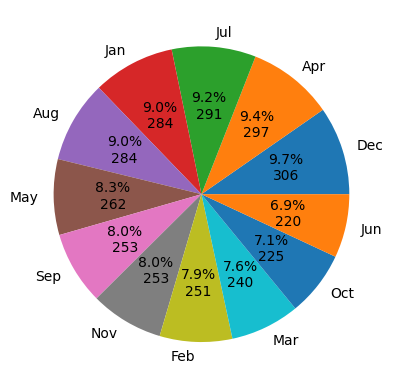

In [219]:

import matplotlib.pyplot as plt

##Which month contains the most/least crime?

## [0] -> Day [1] -> Month [2] -> Year
dates_expanded = pop['Report_Date'].str.split(pat = '-', expand = True)
pop[['Day','Month','Year']] = dates_expanded

## https://stackoverflow.com/questions/73616867/pie-chart-from-count-of-values-showing-the-percentage -- Found this here that helped a ton to make this
## If needed we can use this one, it's just much more boring
##sns.displot(data = pop, x='Month')
total = pop['Month'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)
plt.pie(pop['Month'].value_counts().values, labels=pop['Month'].value_counts().index, autopct=fmt)

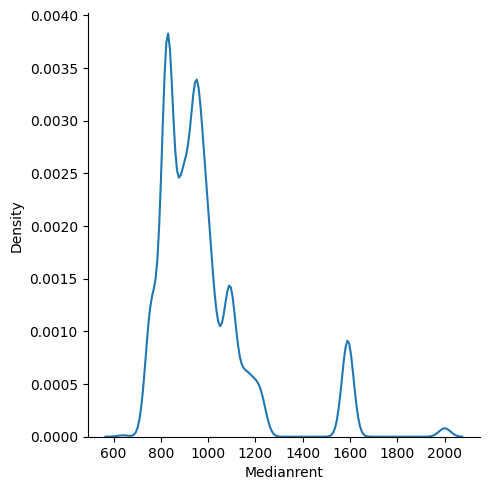

In [220]:
##checks all reported crime and medianrent to find a coorelation

df = pd.read_csv("crime-housing-austin-2015.csv")
##reset to look at all crime again
pop = df[['Location','Medianhouseholdincome','Highest_Offense_Desc','Medianhomevalue','Report_Date','Zip_Code_Housing','Unemployment','Medianrent']]

##properly format the medianrent value
pop = pop[pop.Medianrent.isnull() != True]
pop['Medianrent'] = pop['Medianrent'].replace('[\$,]', '', regex=True).astype(int)
sns.displot(data = pop, x='Medianrent',kind='kde')

In [ ]:
##coordinate corrilation and scatterplot
import matplotlib.pyplot as plt

data = pd.read_csv("crime-housing-austin-2015.csv")
pop = df[['Highest_Offense_Desc','Report_Date','X_Coordinate','Y_Coordinate']]

#convert report date to just the month and an int
pop = pop[pop.X_Coordinate.isnull() != True]
pop = pop[pop.Y_Coordinate.isnull() != True]
pop['Report_Date'] = pd.to_datetime(pop['Report_Date'])
pop['Report_Date'] = pop['Report_Date'].dt.month
pop['Report_Date'] = pop['Report_Date'].astype(int)
pop = pop[pop.Highest_Offense_Desc == 'BURGLARY OF RESIDENCE']
jan = pop[pop.Report_Date == 1]
feb = pop[pop.Report_Date == 2]
mar = pop[pop.Report_Date == 3]
apr = pop[pop.Report_Date == 4]
may = pop[pop.Report_Date == 5]
jun = pop[pop.Report_Date == 6]
jul = pop[pop.Report_Date == 7]
aug = pop[pop.Report_Date == 8]
sep = pop[pop.Report_Date == 9]
oct = pop[pop.Report_Date == 10]
nov = pop[pop.Report_Date == 11]
dec = pop[pop.Report_Date == 12]
#Combine them
jantomar = pd.concat([jan,feb,mar])
aprtojun = pd.concat([apr,may,jun])
jultosep = pd.concat([jul,aug,sep])
octtodec = pd.concat([oct,nov,dec])

combined = pd.concat([jantomar,aprtojun,jultosep])


#Plot
plt.scatter(jantomar['X_Coordinate'],jantomar['Y_Coordinate'],color='grey', s=5)
plt.scatter(aprtojun['X_Coordinate'],aprtojun['Y_Coordinate'],color='green', s=5)
plt.scatter(jultosep['X_Coordinate'],jultosep['Y_Coordinate'],color='red', s=5)
plt.scatter(octtodec['X_Coordinate'],octtodec['Y_Coordinate'],color='blue', s=5)
plt.legend(['Jan-Mar','Apr-Jun','Jul-Sep','Oct-Dec'])
plt.show()


#t-test to see if there is a correlation between x and y corrdinates and crime
from scipy import stats
print(stats.ttest_ind(jantomar['X_Coordinate'],jantomar['Y_Coordinate']))
print(stats.ttest_ind(aprtojun['X_Coordinate'],aprtojun['Y_Coordinate']))
print(stats.ttest_ind(jultosep['X_Coordinate'],jultosep['Y_Coordinate']))
print(stats.ttest_ind(octtodec['X_Coordinate'],octtodec['Y_Coordinate']))
print(stats.ttest_ind(combined['X_Coordinate'],combined['Y_Coordinate']))

In [ ]:
#Heatmap of crime levels with x and y cordiantes
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("crime-housing-austin-2015.csv")
pop = df[['Highest_Offense_Desc','Report_Date','X_Coordinate','Y_Coordinate']]

#convert report date to just the month and an int
pop = pop[pop.X_Coordinate.isnull() != True]
pop = pop[pop.Y_Coordinate.isnull() != True]
pop['Report_Date'] = pd.to_datetime(pop['Report_Date'])
pop['Report_Date'] = pop['Report_Date'].dt.month
pop['Report_Date'] = pop['Report_Date'].astype(int)
pop = pop[pop.Highest_Offense_Desc == 'BURGLARY OF RESIDENCE']

#Plot heatmap
plt.hist2d(pop['X_Coordinate'],pop['Y_Coordinate'], bins=(100,100), cmap=plt.cm.jet)
plt.colorbar()
plt.show()
